# <span style="color: Orange"> Kaggle Competition - Titanic Survival Prediction  </span>
### <span style="color: Orange"> Praveen Karthik Arumugam </span>
### <span style="color: Orange"> www.linkedin.com/in/pk7779 </span>


#### Importing the training data and necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import sklearn as sk
import matplotlib as mp
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)
# suppresses both the warning and the error.
pd.set_option("mode.chained_assignment", None)

titanic_train=pd.read_csv("../input/train.csv")
titanic_train.describe()
titanic_train.dtypes
titanic_train[['Pclass','Age','SibSp','Parch','Sex']].isnull().sum()

Pclass      0
Age       177
SibSp       0
Parch       0
Sex         0
dtype: int64

 ###  <span style="color: Orange"> Data Cleaning</span>

### <span style="color: Orange"> Filling the NaN null values for the feature 'Age' with its mean value and also verifying no NaN values present in the other independent variables

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

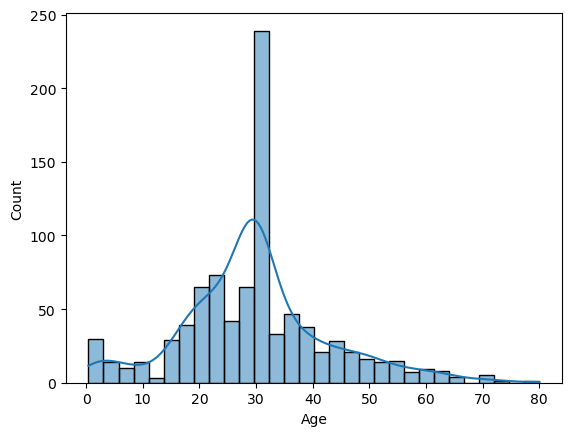

In [2]:
titanic_train.describe()
titanic_train
titanic_train['Age']=titanic_train['Age'].fillna(titanic_train['Age'].mean())
sb.histplot(titanic_train['Age'],kde=True)
titanic_train.isnull().sum()


## <span style="color: Orange"> Feature Engineering 

### <span style="color: Orange">Converting Categorical Class values in "Sex" in Feature into Binary and added as a classification as this is one of the important feature used to predict

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
sex_n=le.fit_transform(titanic_train['Sex'])
titanic_train['sex_n']=sex_n
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_n
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1


In [4]:
titanic_train_source=titanic_train[['Pclass','Age','SibSp','Parch','sex_n','Fare']]
titanic_train_target=titanic_train[['Survived']]
titanic_train_source.shape, titanic_train_target.shape


((891, 6), (891, 1))

In [5]:
# sb.heatmap(titanic_train_source.corr(),annot=True)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
top_features=SelectKBest(score_func=chi2, k=2)
top_features.fit(titanic_train_source,titanic_train_target)
top_features.scores_

# titanic_train_source.columns
x=pd.DataFrame(top_features.scores_, columns=['Scores'])
y=pd.DataFrame(titanic_train_source.columns, columns=['Features'])
y,x

titanic_train_source_scores=pd.concat([x,y],axis=1)
titanic_train_source_scores.nlargest(10,'Scores')

,Scores,Features
5,4518.319091,Fare
4,92.702447,sex_n
0,30.873699,Pclass
1,24.687926,Age
3,10.097499,Parch
2,2.581865,SibSp


## <span style="color: Orange"> Exploratory Data Analysis

### <span style="color: Orange">Fare - Plotting Histogram to understand the plot is skewed or not

<Axes: xlabel='Fare', ylabel='Count'>

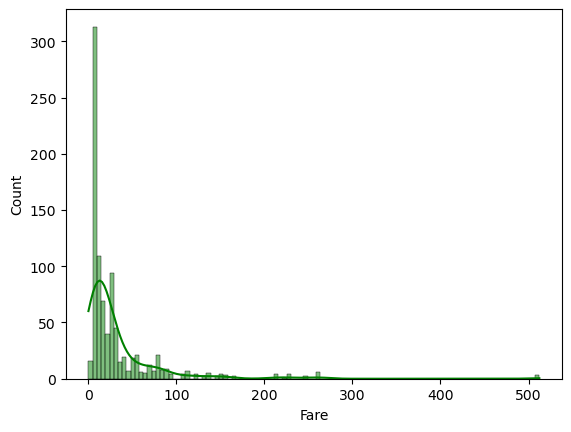

In [6]:
sb.histplot(titanic_train['Fare'],kde=True, color='green')

In [7]:
mean_fare=titanic_train['Fare'].mean()

sd_fare=titanic_train['Fare'].std()

no_of_sd =1
minus_sd_fare=mean_fare - (no_of_sd * sd_fare)

plus_sd_fare=mean_fare + (no_of_sd * sd_fare)
mean_fare, sd_fare, minus_sd_fare , plus_sd_fare


(32.204207968574636, 49.693428597180905, -17.48922062860627, 81.89763656575553)

<Axes: xlabel='Fare', ylabel='Count'>

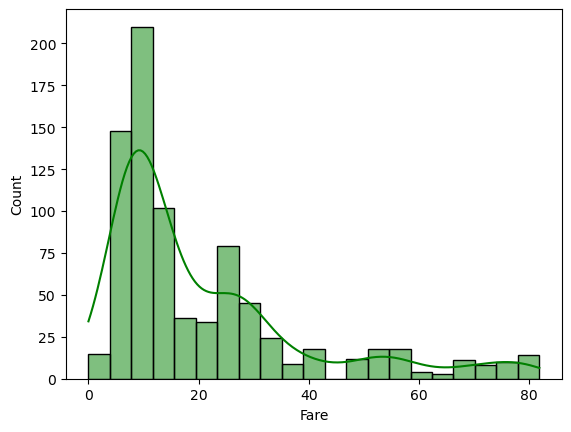

In [8]:
titanic_train_no_outlier=titanic_train[(titanic_train['Fare']>minus_sd_fare) & (titanic_train['Fare']<plus_sd_fare)]
titanic_train_no_outlier

sb.histplot(titanic_train_no_outlier['Fare'], kde=True, color='green')

### <span style="color: Orange">Age - Plotting Histogram to understand the plot is skewed or not

<Axes: xlabel='Age', ylabel='Count'>

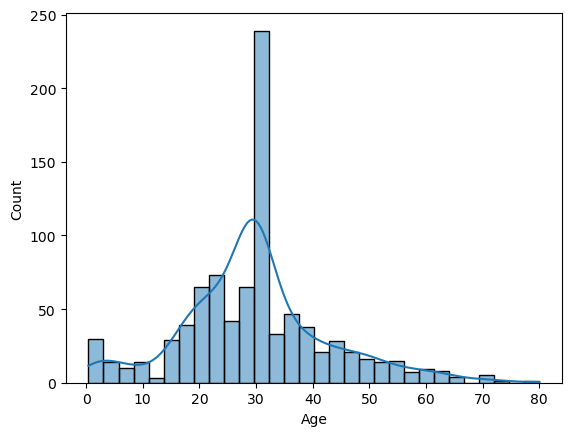

In [9]:
sb.histplot(titanic_train['Age'],kde=True)

### <span style="color: Orange"> Using  2*standard deviation to remove the outliers

In [10]:
mean_age=titanic_train['Age'].mean()

sd_age=titanic_train['Age'].std()

no_of_sd =2
minus_sd_age=mean_age - (no_of_sd * sd_age)

plus_sd_age=mean_age + (no_of_sd * sd_age)
mean_age, sd_age, minus_sd_age , plus_sd_age


(29.69911764705882, 13.002015226002884, 3.695087195053052, 55.70314809906459)

### <span style="color: Orange">After removing the outliers, the Histogram plot is done to visualize the removal of the outliers, that also shows the normalization of the bell curve aka gaussian distribution

<Axes: xlabel='Age', ylabel='Count'>

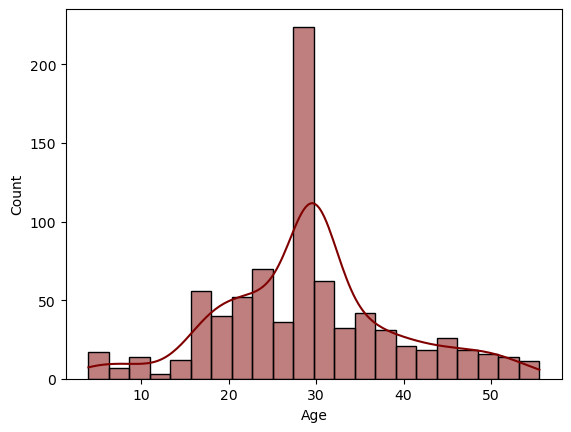

In [11]:
titanic_train_no_outlier=titanic_train[(titanic_train['Age']>minus_sd_age) & (titanic_train['Age']<plus_sd_age)]
titanic_train_no_outlier

sb.histplot(titanic_train_no_outlier['Age'], kde=True, color='maroon')

In [12]:
titanic_train_no_outlier.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex_n
count,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000
mean,447.822384,0.377129,2.339416,29.164530,0.496350,0.349148,31.476692,0.643552
std,257.550861,0.484963,0.826114,10.080463,1.082183,0.794925,50.049376,0.479241
min,1.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,225.250000,0.000000,2.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,447.500000,0.000000,3.000000,29.699118,0.000000,0.000000,13.000000,1.000000
75%,671.750000,1.000000,3.000000,34.000000,1.000000,0.000000,30.053100,1.000000
max,891.000000,1.000000,3.000000,55.500000,8.000000,6.000000,512.329200,1.000000


## <span style="color: Orange"> Prediction

### <span style="color: Orange"> Test Data - Performing Labelencoding for Feature 'Sex' and creating the a new data frame matching the feature list of the training dataframe </span>

In [13]:
titanic_test=pd.read_csv("../input/test.csv")
from sklearn.preprocessing import LabelEncoder
lb_test=LabelEncoder()
sex_n_test=lb_test.fit_transform(titanic_test['Sex'])
sex_n_test
titanic_test['sex_n']=sex_n_test
titanic_test
titanic_test=titanic_test.dropna(subset=['Pclass','Age','Sex'])
titanic_test['Survived']=0
titanic_test_target=titanic_test[['Survived']]
titanic_test_source=titanic_test[['Pclass','Age','SibSp','Parch','sex_n','Fare']]
titanic_test_source.shape,titanic_test_target.shape

((332, 6), (332, 1))

### <span style="color: Orange"> Created a reusable function to create models using different classifcation algorithms and to predict the score of the train/test data for all the algorithms and compare the same   </span>

In [14]:
def getModel(sourceFeature, targetFeature, datasetToPredict):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    
    logReg= LogisticRegression()
    dtc = DecisionTreeClassifier()
    rfc = RandomForestClassifier()
    abc = AdaBoostClassifier()
    gbc = GradientBoostingClassifier()

    models = {
        'lor':logReg,
        'dt':dtc,
        'rf':rfc,
        'ab':abc,
        'gb':gbc

    }
#     trained_model_final
    for x in models:
            print(models[x] , "Score :: ")
            trained_model=models[x].fit(sourceFeature,targetFeature)
            print(trained_model.score(sourceFeature,targetFeature))
            prediction=trained_model.predict(datasetToPredict)
#             print(prediction)


In [15]:
fare_mean=titanic_test_source['Fare'].mean()
titanic_test_source['Fare']=titanic_test_source['Fare'].fillna(fare_mean)
# titanic_test_source['Fare']=iloc[:,0:titanic_test_source['Fare'].fillna(fare_mean)]

titanic_test_source['Fare'].isna().sum()
titanic_test_source.isna().sum()
# fare_mean

Pclass    0
Age       0
SibSp     0
Parch     0
sex_n     0
Fare      0
dtype: int64

### <span style="color: Orange"> Getting score using the training data set </span>

In [16]:
getModel(titanic_train_source,titanic_train_target, titanic_train_source)

LogisticRegression() Score :: 
0.797979797979798
DecisionTreeClassifier() Score :: 
0.9820426487093153
RandomForestClassifier() Score :: 
0.9820426487093153
AdaBoostClassifier() Score :: 
0.8383838383838383
GradientBoostingClassifier() Score :: 
0.9057239057239057


In [17]:
titanic_test_target

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
409,0
411,0
412,0
414,0


In [18]:

titanic_train_source.shape, titanic_test_source.shape


((891, 6), (332, 6))

### <span style="color: Orange"> Getting the score for test data set for comparison </span>

In [19]:
getModel(titanic_train_source,titanic_train_target, titanic_test_source)

LogisticRegression() Score :: 
0.797979797979798
DecisionTreeClassifier() Score :: 
0.9820426487093153
RandomForestClassifier() Score :: 
0.9820426487093153
AdaBoostClassifier() Score :: 
0.8383838383838383
GradientBoostingClassifier() Score :: 
0.9057239057239057
